In [4]:
import os, numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras import layers

OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

NOISE_DIM = 100
BATCH_SIZE = 128


In [5]:
def build_generator():
    m = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(NOISE_DIM,)),
        layers.BatchNormalization(), layers.LeakyReLU(),
        layers.Reshape((7,7,256)),
        layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False),
        layers.BatchNormalization(), layers.LeakyReLU(),
        layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(), layers.LeakyReLU(),
        layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh')
    ])
    return m

def build_discriminator():
    m = tf.keras.Sequential([
        layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[28,28,1]),
        layers.LeakyReLU(), layers.Dropout(0.3),
        layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
        layers.LeakyReLU(), layers.Dropout(0.3),
        layers.Flatten(), layers.Dense(1, activation='sigmoid')
    ])
    return m

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def g_loss(fake_out):
    return bce(tf.ones_like(fake_out), fake_out)

def d_loss(real_out, fake_out):
    real = bce(tf.ones_like(real_out), real_out)
    fake = bce(tf.zeros_like(fake_out), fake_out)
    return real + fake

def generate_and_save_images(model, epoch, fixed_noise, tag):
    preds = model(fixed_noise, training=False)
    fig = plt.figure(figsize=(4,4))
    for i in range(preds.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow((preds[i,:,:,0]+1)/2, cmap='gray'); plt.axis('off')
    plt.suptitle(f"{tag} — Época {epoch}")
    fpath = os.path.join(OUT_DIR, f"{tag.lower()}_epoch_{epoch:03d}.png")
    plt.savefig(fpath, bbox_inches='tight', dpi=150); plt.show()
    print("Guardado:", fpath)

def plot_and_save_losses(g_hist, d_hist, tag):
    plt.figure(figsize=(7,4))
    plt.plot(g_hist, label="Generador"); plt.plot(d_hist, label="Discriminador")
    plt.xlabel("Épocas"); plt.ylabel("BCE"); plt.title(f"{tag} — Pérdidas"); plt.legend()
    fpath = os.path.join(OUT_DIR, f"{tag.lower()}_losses.png")
    plt.savefig(fpath, bbox_inches='tight', dpi=150); plt.show()
    print("Guardado:", fpath)


MNIST Epoch 1/50 | G:0.8065 D:1.1203


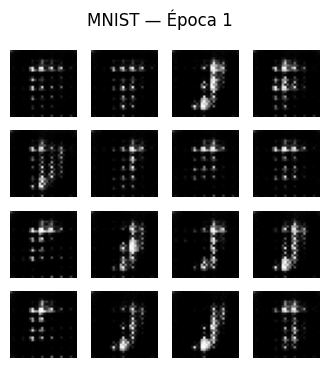

Guardado: outputs/mnist_epoch_001.png
MNIST Epoch 2/50 | G:0.8787 D:1.2332
MNIST Epoch 3/50 | G:0.8832 D:1.2598
MNIST Epoch 4/50 | G:0.8873 D:1.2521
MNIST Epoch 5/50 | G:0.8898 D:1.2690
MNIST Epoch 6/50 | G:0.9437 D:1.2004
MNIST Epoch 7/50 | G:0.9960 D:1.1784
MNIST Epoch 8/50 | G:1.1627 D:1.0488
MNIST Epoch 9/50 | G:1.1639 D:1.0760
MNIST Epoch 10/50 | G:1.1508 D:1.0857


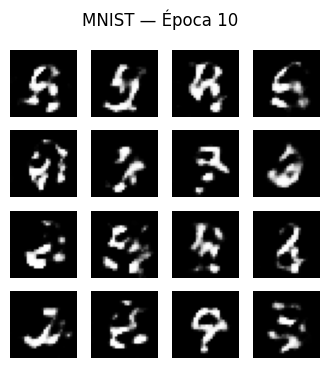

Guardado: outputs/mnist_epoch_010.png
MNIST Epoch 11/50 | G:1.1614 D:1.0732
MNIST Epoch 12/50 | G:1.2637 D:1.0130
MNIST Epoch 13/50 | G:1.2440 D:1.0422
MNIST Epoch 14/50 | G:1.2175 D:1.0689
MNIST Epoch 15/50 | G:1.1850 D:1.0944
MNIST Epoch 16/50 | G:1.1405 D:1.1378
MNIST Epoch 17/50 | G:1.0700 D:1.1643
MNIST Epoch 18/50 | G:1.0408 D:1.1678
MNIST Epoch 19/50 | G:0.9961 D:1.2015
MNIST Epoch 20/50 | G:1.0320 D:1.1968


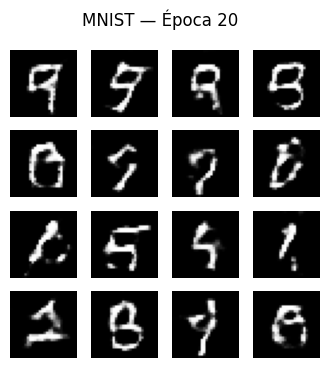

Guardado: outputs/mnist_epoch_020.png
MNIST Epoch 21/50 | G:1.0516 D:1.1720
MNIST Epoch 22/50 | G:0.9530 D:1.2144
MNIST Epoch 23/50 | G:0.9765 D:1.2183
MNIST Epoch 24/50 | G:1.0285 D:1.2065
MNIST Epoch 25/50 | G:0.9724 D:1.2145
MNIST Epoch 26/50 | G:0.9578 D:1.2147
MNIST Epoch 27/50 | G:0.9391 D:1.2236
MNIST Epoch 28/50 | G:1.0001 D:1.2084
MNIST Epoch 29/50 | G:0.9889 D:1.2184
MNIST Epoch 30/50 | G:0.9563 D:1.2205


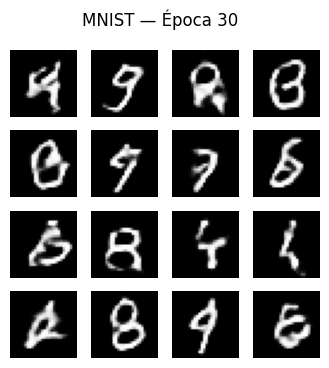

Guardado: outputs/mnist_epoch_030.png
MNIST Epoch 31/50 | G:0.9212 D:1.2359
MNIST Epoch 32/50 | G:0.9482 D:1.2281
MNIST Epoch 33/50 | G:0.9887 D:1.2138
MNIST Epoch 34/50 | G:0.9390 D:1.2260
MNIST Epoch 35/50 | G:0.9541 D:1.2205
MNIST Epoch 36/50 | G:0.9340 D:1.2308
MNIST Epoch 37/50 | G:0.9567 D:1.2288
MNIST Epoch 38/50 | G:1.0139 D:1.2102
MNIST Epoch 39/50 | G:0.9486 D:1.2252
MNIST Epoch 40/50 | G:0.9222 D:1.2297


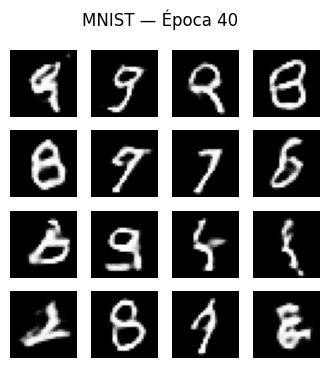

Guardado: outputs/mnist_epoch_040.png
MNIST Epoch 41/50 | G:0.9552 D:1.2328
MNIST Epoch 42/50 | G:0.9750 D:1.2232
MNIST Epoch 43/50 | G:0.9457 D:1.2312
MNIST Epoch 44/50 | G:0.9281 D:1.2408
MNIST Epoch 45/50 | G:0.9397 D:1.2381
MNIST Epoch 46/50 | G:0.9252 D:1.2398
MNIST Epoch 47/50 | G:0.9359 D:1.2386
MNIST Epoch 48/50 | G:0.9542 D:1.2289
MNIST Epoch 49/50 | G:0.9496 D:1.2444
MNIST Epoch 50/50 | G:0.9258 D:1.2402


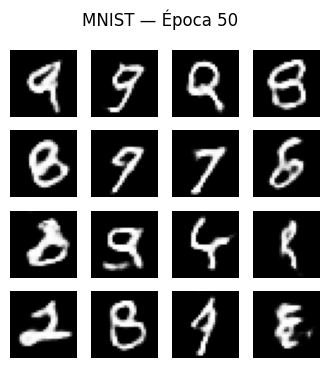

Guardado: outputs/mnist_epoch_050.png


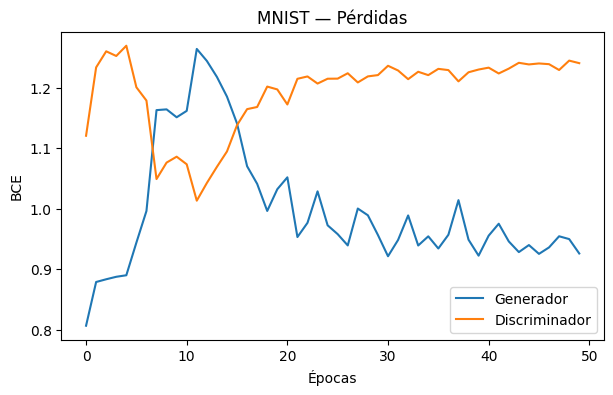

Guardado: outputs/mnist_losses.png


In [6]:
# Datos MNIST
(x_train, _), _ = tf.keras.datasets.mnist.load_data()
x_train = (x_train - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0]).batch(BATCH_SIZE)

# Modelos/optimizadores
generator = build_generator()
discriminator = build_discriminator()
g_opt = tf.keras.optimizers.Adam(1e-4)
d_opt = tf.keras.optimizers.Adam(1e-4)

EPOCHS = 50
fixed_noise = tf.random.normal([16, NOISE_DIM])
g_losses, d_losses = [], []

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
        fake = generator(noise, training=True)
        real_out = discriminator(images, training=True)
        fake_out = discriminator(fake, training=True)
        gl = g_loss(fake_out)
        dl = d_loss(real_out, fake_out)
    g_grads = g_tape.gradient(gl, generator.trainable_variables)
    d_grads = d_tape.gradient(dl, discriminator.trainable_variables)
    g_opt.apply_gradients(zip(g_grads, generator.trainable_variables))
    d_opt.apply_gradients(zip(d_grads, discriminator.trainable_variables))
    return gl, dl

for epoch in range(1, EPOCHS+1):
    g_epoch, d_epoch = [], []
    for batch in dataset:
        gl, dl = train_step(batch)
        g_epoch.append(gl); d_epoch.append(dl)
    g_losses.append(float(np.mean(g_epoch)))
    d_losses.append(float(np.mean(d_epoch)))
    print(f"MNIST Epoch {epoch}/{EPOCHS} | G:{g_losses[-1]:.4f} D:{d_losses[-1]:.4f}")
    if epoch % 10 == 0 or epoch in (1, EPOCHS):
        generate_and_save_images(generator, epoch, fixed_noise, tag="MNIST")

plot_and_save_losses(g_losses, d_losses, tag="MNIST")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Fashion Epoch 1/70 | G:0.8360 D:1.1821


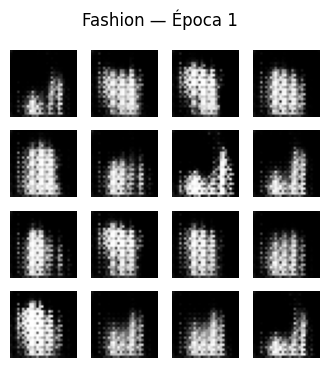

Guardado: outputs/fashion_epoch_001.png
Fashion Epoch 2/70 | G:0.8978 D:1.1954
Fashion Epoch 3/70 | G:0.9046 D:1.2853
Fashion Epoch 4/70 | G:0.8999 D:1.2426
Fashion Epoch 5/70 | G:0.8825 D:1.2227
Fashion Epoch 6/70 | G:0.9447 D:1.1893
Fashion Epoch 7/70 | G:0.9930 D:1.1653
Fashion Epoch 8/70 | G:1.0508 D:1.0952
Fashion Epoch 9/70 | G:1.2044 D:0.9917
Fashion Epoch 10/70 | G:1.3759 D:0.8767


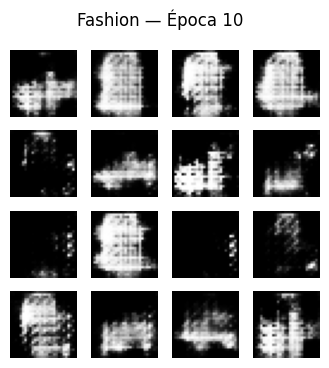

Guardado: outputs/fashion_epoch_010.png
Fashion Epoch 11/70 | G:1.6112 D:0.8037
Fashion Epoch 12/70 | G:1.7187 D:0.7215
Fashion Epoch 13/70 | G:2.0949 D:0.6731
Fashion Epoch 14/70 | G:1.7510 D:0.7200
Fashion Epoch 15/70 | G:1.6953 D:0.7747
Fashion Epoch 16/70 | G:1.7714 D:0.7406
Fashion Epoch 17/70 | G:1.9794 D:0.6565
Fashion Epoch 18/70 | G:1.7626 D:0.7547
Fashion Epoch 19/70 | G:1.6839 D:0.7845
Fashion Epoch 20/70 | G:1.7438 D:0.7851


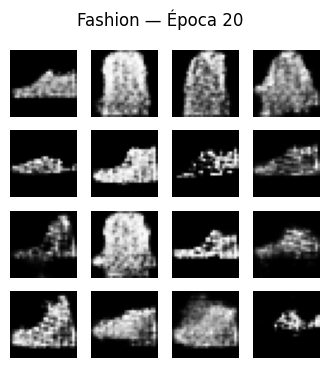

Guardado: outputs/fashion_epoch_020.png
Fashion Epoch 21/70 | G:1.5455 D:0.8894
Fashion Epoch 22/70 | G:1.5065 D:0.9008
Fashion Epoch 23/70 | G:1.5816 D:0.8584
Fashion Epoch 24/70 | G:1.6606 D:0.8307
Fashion Epoch 25/70 | G:1.4809 D:0.9301
Fashion Epoch 26/70 | G:1.3866 D:0.9622
Fashion Epoch 27/70 | G:1.5151 D:0.8867
Fashion Epoch 28/70 | G:1.3531 D:0.9966
Fashion Epoch 29/70 | G:1.2783 D:1.0360
Fashion Epoch 30/70 | G:1.2595 D:1.0235


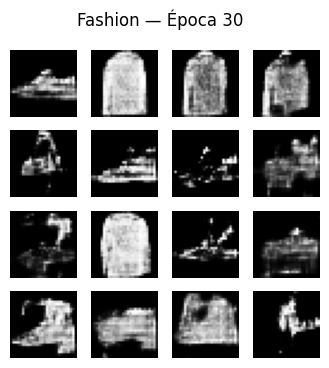

Guardado: outputs/fashion_epoch_030.png
Fashion Epoch 31/70 | G:1.4154 D:0.9412
Fashion Epoch 32/70 | G:1.3736 D:0.9811
Fashion Epoch 33/70 | G:1.3119 D:1.0068
Fashion Epoch 34/70 | G:1.4380 D:0.9298
Fashion Epoch 35/70 | G:1.4283 D:0.9377
Fashion Epoch 36/70 | G:1.2745 D:1.0261
Fashion Epoch 37/70 | G:1.2911 D:1.0142
Fashion Epoch 38/70 | G:1.2655 D:1.0330
Fashion Epoch 39/70 | G:1.2277 D:1.0565
Fashion Epoch 40/70 | G:1.2581 D:1.0371


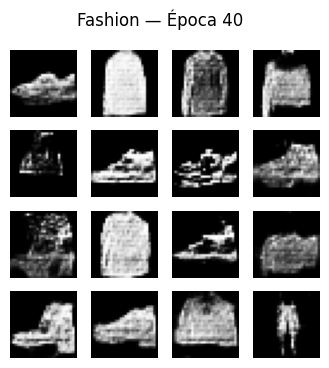

Guardado: outputs/fashion_epoch_040.png
Fashion Epoch 41/70 | G:1.2242 D:1.0677
Fashion Epoch 42/70 | G:1.2134 D:1.0699
Fashion Epoch 43/70 | G:1.1887 D:1.0873
Fashion Epoch 44/70 | G:1.1150 D:1.1293
Fashion Epoch 45/70 | G:1.1272 D:1.1182
Fashion Epoch 46/70 | G:1.1686 D:1.0885
Fashion Epoch 47/70 | G:1.1384 D:1.1104
Fashion Epoch 48/70 | G:1.1714 D:1.0847
Fashion Epoch 49/70 | G:1.1464 D:1.1176
Fashion Epoch 50/70 | G:1.0903 D:1.1490


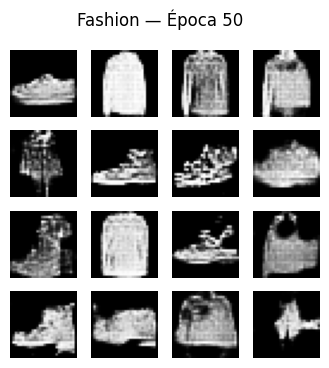

Guardado: outputs/fashion_epoch_050.png
Fashion Epoch 51/70 | G:1.0963 D:1.1339
Fashion Epoch 52/70 | G:1.0853 D:1.1495
Fashion Epoch 53/70 | G:1.0786 D:1.1521
Fashion Epoch 54/70 | G:1.0702 D:1.1587
Fashion Epoch 55/70 | G:1.0549 D:1.1699
Fashion Epoch 56/70 | G:1.0536 D:1.1779
Fashion Epoch 57/70 | G:1.0432 D:1.1806
Fashion Epoch 58/70 | G:1.0190 D:1.1976
Fashion Epoch 59/70 | G:1.0138 D:1.1953
Fashion Epoch 60/70 | G:1.0206 D:1.1855


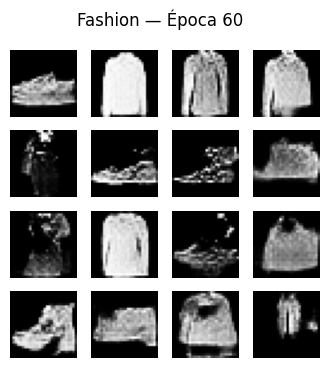

Guardado: outputs/fashion_epoch_060.png
Fashion Epoch 61/70 | G:1.0224 D:1.1838
Fashion Epoch 62/70 | G:1.2956 D:1.0087
Fashion Epoch 63/70 | G:1.0420 D:1.1997
Fashion Epoch 64/70 | G:1.0012 D:1.1955
Fashion Epoch 65/70 | G:1.0020 D:1.1985
Fashion Epoch 66/70 | G:1.0083 D:1.1929
Fashion Epoch 67/70 | G:1.0067 D:1.1858
Fashion Epoch 68/70 | G:1.0077 D:1.1935
Fashion Epoch 69/70 | G:1.0028 D:1.1921
Fashion Epoch 70/70 | G:1.0079 D:1.1995


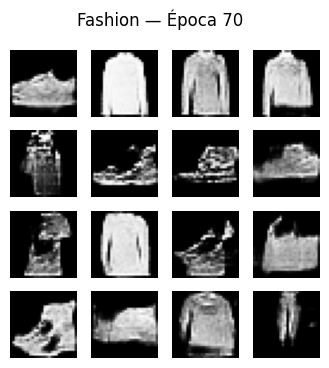

Guardado: outputs/fashion_epoch_070.png


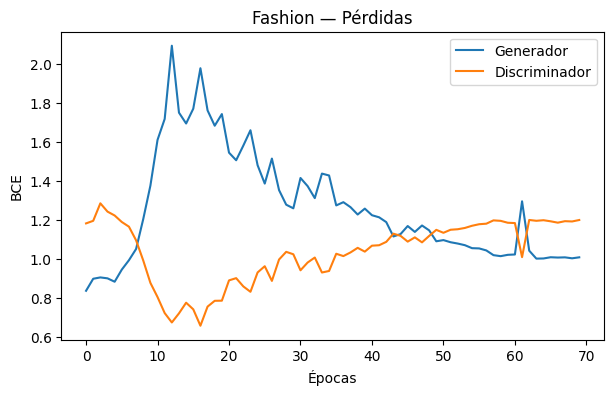

Guardado: outputs/fashion_losses.png


In [7]:
# Datos Fashion-MNIST
(x_train, _), _ = tf.keras.datasets.fashion_mnist.load_data()
x_train = (x_train - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0]).batch(BATCH_SIZE)

# Modelos/optimizadores nuevos (separados de MNIST)
generator = build_generator()
discriminator = build_discriminator()
g_opt = tf.keras.optimizers.Adam(1e-4)
d_opt = tf.keras.optimizers.Adam(1e-4)

EPOCHS = 70
fixed_noise = tf.random.normal([16, NOISE_DIM])
g_losses, d_losses = [], []

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
        fake = generator(noise, training=True)
        real_out = discriminator(images, training=True)
        fake_out = discriminator(fake, training=True)
        gl = g_loss(fake_out)
        dl = d_loss(real_out, fake_out)
    g_grads = g_tape.gradient(gl, generator.trainable_variables)
    d_grads = d_tape.gradient(dl, discriminator.trainable_variables)
    g_opt.apply_gradients(zip(g_grads, generator.trainable_variables))
    d_opt.apply_gradients(zip(d_grads, discriminator.trainable_variables))
    return gl, dl

for epoch in range(1, EPOCHS+1):
    g_epoch, d_epoch = [], []
    for batch in dataset:
        gl, dl = train_step(batch)
        g_epoch.append(gl); d_epoch.append(dl)
    g_losses.append(float(np.mean(g_epoch)))
    d_losses.append(float(np.mean(d_epoch)))
    print(f"Fashion Epoch {epoch}/{EPOCHS} | G:{g_losses[-1]:.4f} D:{d_losses[-1]:.4f}")
    if epoch % 10 == 0 or epoch in (1, EPOCHS):
        generate_and_save_images(generator, epoch, fixed_noise, tag="Fashion")

plot_and_save_losses(g_losses, d_losses, tag="Fashion")


In [8]:
import shutil
zip_path = "outputs.zip"
if os.path.exists(zip_path):
    os.remove(zip_path)
shutil.make_archive("outputs", "zip", "outputs")

from google.colab import files
files.download("outputs.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>